In [ ]:
# Image: https://unsplash.com/s/photos/sheep

In [32]:
import torch
import torch.nn as nn
from torchvision import models
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.models.segmentation import fcn_resnet50

In [124]:
! wget -O sheep.jpeg "https://images.unsplash.com/photo-1484557985045-edf25e08da73?q=80&w=1973&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

--2025-03-05 18:46:51--  https://images.unsplash.com/photo-1484557985045-edf25e08da73?q=80&w=1973&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D
Resolving images.unsplash.com (images.unsplash.com)... 2a04:4e42:56::720, 151.101.46.208
Connecting to images.unsplash.com (images.unsplash.com)|2a04:4e42:56::720|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328832 (321K) [image/jpeg]
Saving to: ‘sheep.jpeg’

sheep.jpeg          100%[===================>] 321.12K  --.-KB/s    in 0.03s   

2025-03-05 18:46:51 (10.4 MB/s) - ‘sheep.jpeg’ saved [328832/328832]



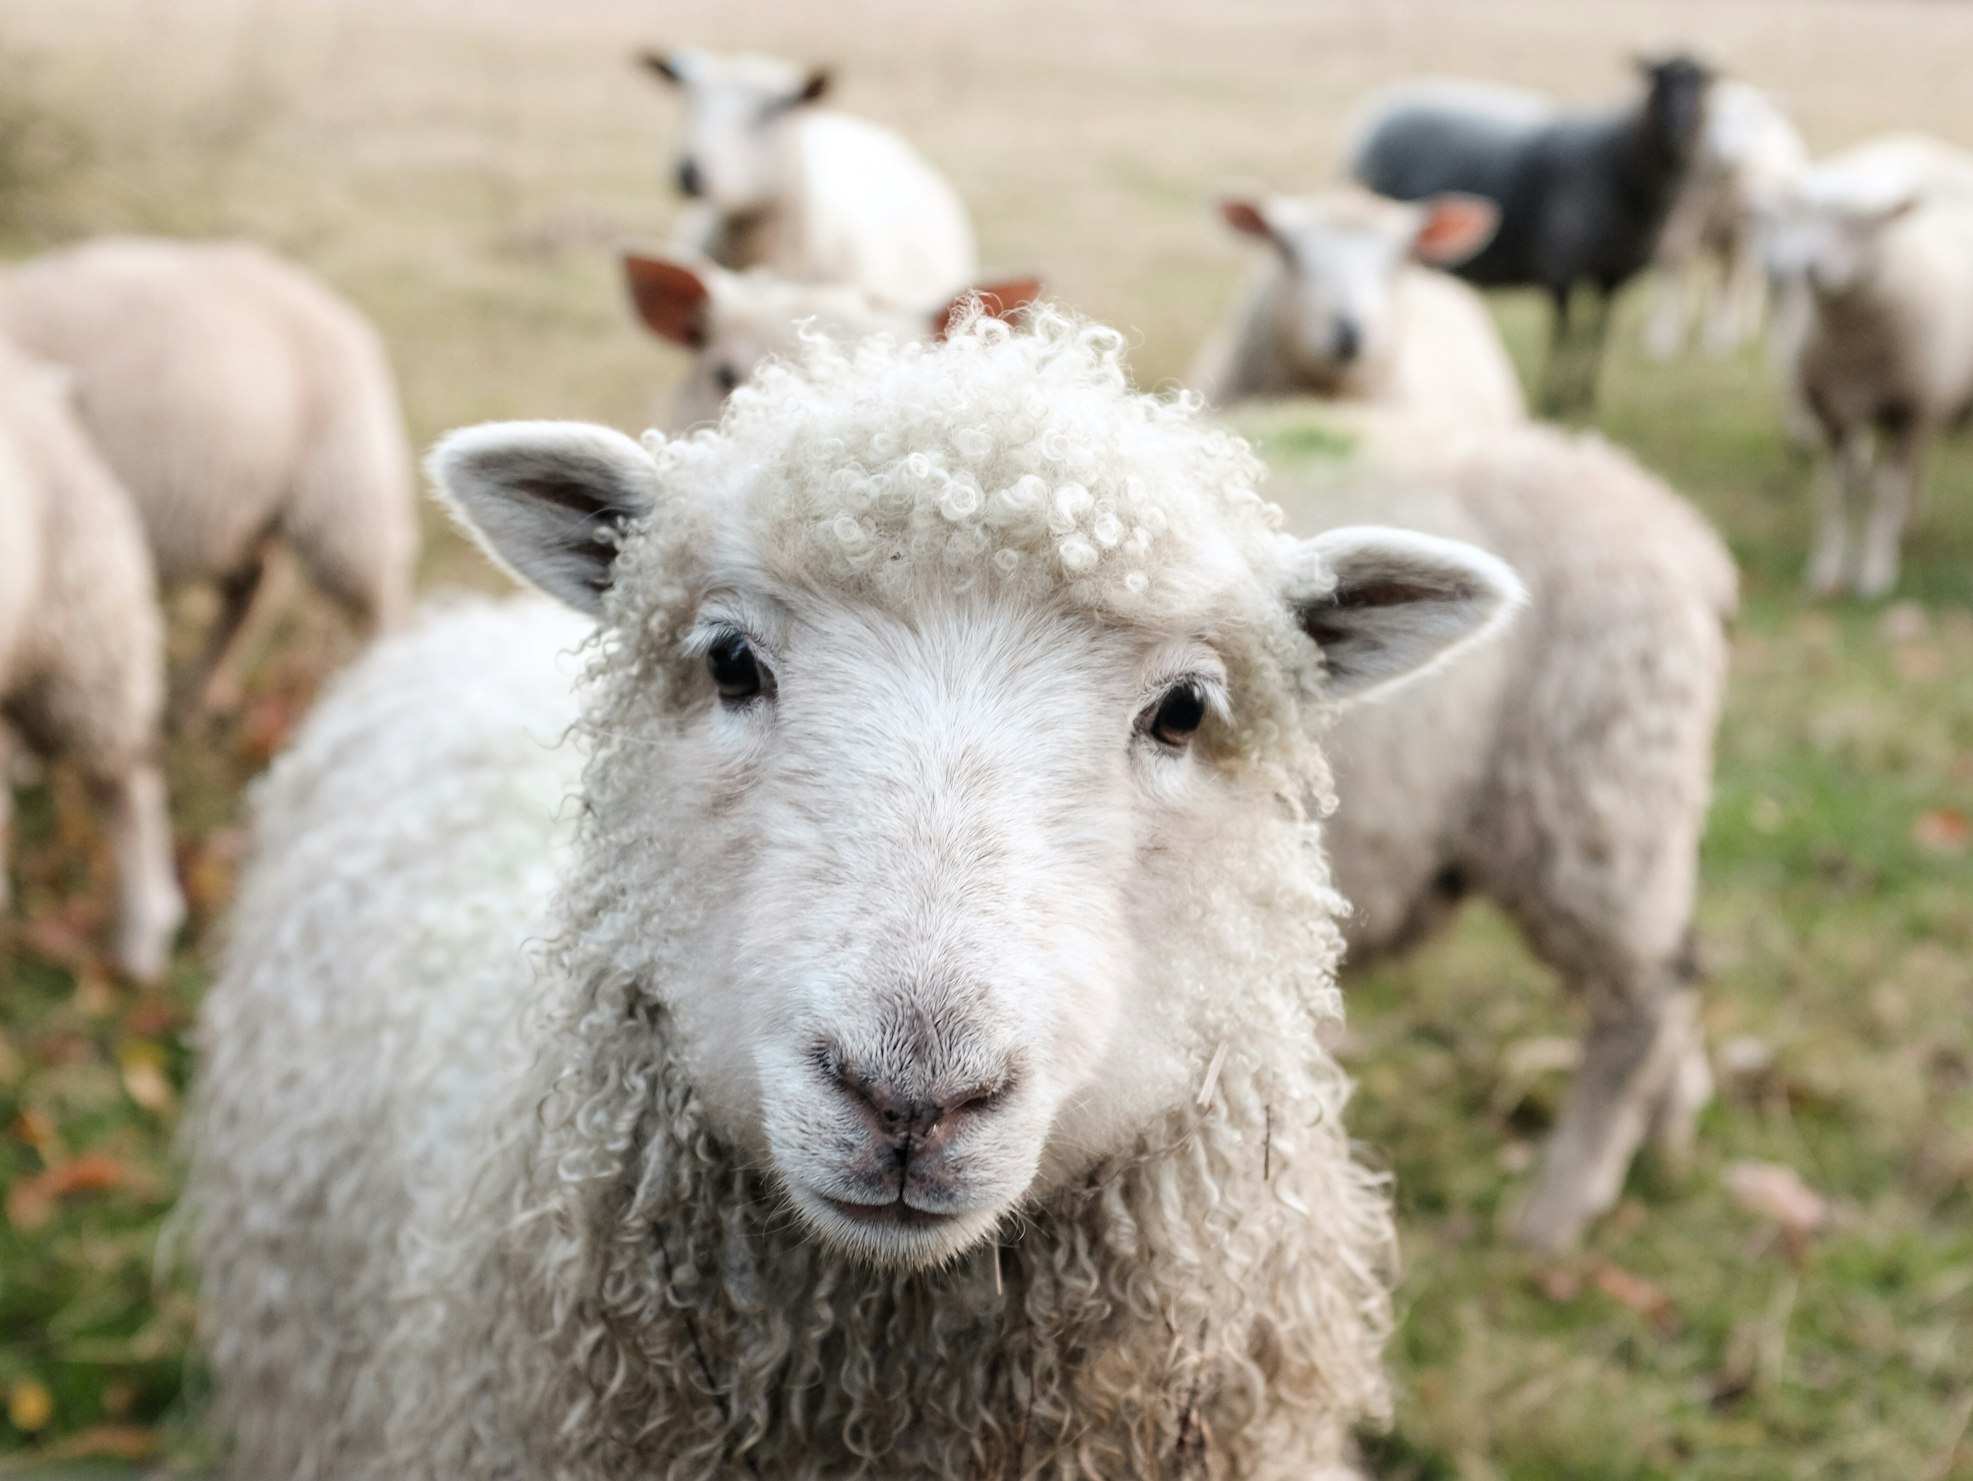

In [125]:
img = Image.open("sheep.jpeg")
img

In [126]:
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

img_t = preprocess(img)
img_t.shape

torch.Size([3, 224, 224])

In [ ]:
def get_top5_predictions(output, weights):
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    top5_prob, top5_catid = torch.topk(probabilities, 5)
    labels = weights.meta["categories"]
    return [(labels[idx], prob.item()) for idx, prob in zip(top5_catid, top5_prob)]

In [ ]:
batch_t = torch.unsqueeze(img_t, 0)
batch_t.shape

torch.Size([1, 3, 224, 224])

In [6]:
alexnet = models.alexnet(weights=models.AlexNet_Weights.IMAGENET1K_V1)
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
with torch.no_grad():
    alexnet_o = alexnet(batch_t)

In [ ]:
alexnet_l = get_top5_predictions(alexnet_o, models.AlexNet_Weights.DEFAULT)

In [ ]:
print("Top-5 predictions from AlexNet:")
for label, prob in alexnet_l:
    print(f"{label}: {prob:.4f}")

Top-5 predictions from AlexNet:
Bedlington terrier: 0.4889
wire-haired fox terrier: 0.3216
llama: 0.0502
komondor: 0.0494
Lakeland terrier: 0.0481


In [10]:
resnet = models.resnet101(weights=models.ResNet101_Weights.IMAGENET1K_V1)
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
with torch.no_grad():
    resnet_o = resnet(batch_t)

In [ ]:
resnet_l = get_top5_predictions(resnet_o, models.ResNet101_Weights.DEFAULT)

In [ ]:
print("\nTop-5 predictions from ResNet101:")
for label, prob in resnet_l:
    print(f"{label}: {prob:.4f}")


Top-5 predictions from ResNet101:
ram: 0.9116
bighorn: 0.0559
llama: 0.0105
komondor: 0.0066
standard poodle: 0.0040


In [36]:
cycleGAN = fcn_resnet50(weights="DEFAULT")
cycleGAN.eval()


Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /Users/daiyan/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100.0%


FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [46]:
with torch.no_grad():
    cycleGAN_t = cycleGAN(batch_t)['out']

In [62]:
cycleGAN_t = cycleGAN_t.cpu().numpy() if isinstance(cycleGAN_t, torch.Tensor) else cycleGAN_t
cycleGAN_t = ((cycleGAN_t - cycleGAN_t.min()) / (cycleGAN_t.max() - cycleGAN_t.min()) * 255).astype('uint8')
cycleGAN_t = cycleGAN_t.squeeze()
cycleGAN_img = Image.fromarray(cycleGAN_t.astype('uint8')) if cycleGAN_t.ndim == 2 else Image.fromarray(cycleGAN_t[0].astype('uint8'))


Text(0.5, 1.0, 'Transformed Image (CycleGAN)')

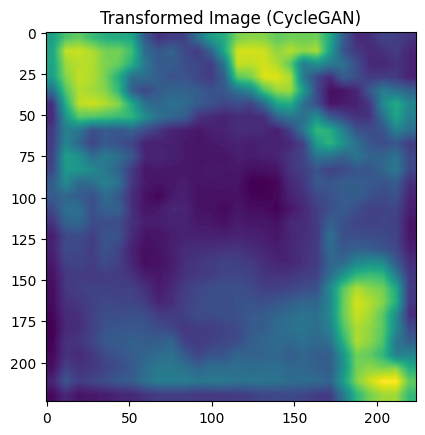

In [ ]:
plt.imshow(cycleGAN_img)
plt.title("Transformed Image (CycleGAN)") # The transformation of this image sucks, since its mostly one color

In [103]:
! git clone https://github.com/deep-learning-with-pytorch/ImageCaptioning.pytorch.git

Cloning into 'ImageCaptioning.pytorch'...
remote: Enumerating objects: 519, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 519 (delta 0), reused 0 (delta 0), pack-reused 518 (from 1)
Receiving objects: 100% (519/519), 206.53 MiB | 6.01 MiB/s, done.
Resolving deltas: 100% (328/328), done.


In [104]:
%cd ImageCaptioning.pytorch/

/Users/daiyan/Github/CMP-765/5/ImageCaptioning.pytorch


/Users/daiyan/Library/Python/3.9/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [106]:
! mv sheep.jpeg ./data

mv: rename sheep.jpeg to ./data/sheep.jpeg: No such file or directory


In [108]:
! pwd

/Users/daiyan/Github/CMP-765/5/ImageCaptioning.pytorch


In [109]:
! mv ./../sheep.jpeg ./data

In [110]:
! ls ./data

FC               imagenet_weights sheep.jpeg


In [121]:
! python3 eval.py --model ./data/FC/fc-model.pth --infos_path ./data/FC/fc-infos.pkl --image_folder ./data --num_images 1

Traceback (most recent call last):
  File "/Users/daiyan/Github/CMP-765/5/ImageCaptioning.pytorch/eval.py", line 126, in <module>
    loader = DataLoaderRaw({'folder_path': opt.image_folder,
  File "/Users/daiyan/Github/CMP-765/5/ImageCaptioning.pytorch/dataloaderraw.py", line 40, in __init__
    self.my_resnet.load_state_dict(torch.load('./data/imagenet_weights/'+self.cnn_model+'.pth'))
  File "/Users/daiyan/Library/Python/3.9/lib/python/site-packages/torch/serialization.py", line 1487, in load
    return _legacy_load(
  File "/Users/daiyan/Library/Python/3.9/lib/python/site-packages/torch/serialization.py", line 1727, in _legacy_load
    return legacy_load(f)
  File "/Users/daiyan/Library/Python/3.9/lib/python/site-packages/torch/serialization.py", line 1597, in legacy_load
    raise RuntimeError(
RuntimeError: Cannot use ``weights_only=True`` with files saved in the legacy .tar format. In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `